In [148]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import math

In [122]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [123]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [124]:
file = '../DATA/남북한발전전력량.xlsx'

In [125]:
powerDF = pd.read_excel(file, index_col = [0, 1])

In [126]:
print(powerDF.index, powerDF.columns, sep = '\n\n')

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


In [127]:
# '-' => '0'
powerDF.replace('-', 0, inplace = True)

In [128]:
# object => int16
powerDF = powerDF.astype('int16')  # astpye 메서드는 inplace 파라미터가 없다.
powerDF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int16
 1   1991    9 non-null      int16
 2   1992    9 non-null      int16
 3   1993    9 non-null      int16
 4   1994    9 non-null      int16
 5   1995    9 non-null      int16
 6   1996    9 non-null      int16
 7   1997    9 non-null      int16
 8   1998    9 non-null      int16
 9   1999    9 non-null      int16
 10  2000    9 non-null      int16
 11  2001    9 non-null      int16
 12  2002    9 non-null      int16
 13  2003    9 non-null      int16
 14  2004    9 non-null      int16
 15  2005    9 non-null      int16
 16  2006    9 non-null      int16
 17  2007    9 non-null      int16
 18  2008    9 non-null      int16
 19  2009    9 non-null      int16
 20  2010    9 non-null      int16
 21  2011    9 non-null      int16
 22  2012    9 non-null      int16
 

In [129]:
powerDF

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        0     0     0     0     0     0     0     0     0     0   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        0     0     0     0     0     0     0     0     0     0   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     0     0     0     0     0    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     0     0     0     0     0     0     0     0     0   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        0  

[9 rows x 27 columns]

In [130]:
# 북한 신재생 발전 추가 => 값은 전부 0으로 한다.
for year in powerDF.columns:
    powerDF.loc[('북한', '신재생'), year] = 0

In [170]:
# 합계 데이터는 필요 없으므로 삭제
powerDF = powerDF.drop([('남한', '합계'), ('북한', '합계')])

In [171]:
powerDF

1990   1991   1992   1993    1994    1995    1996    1997  \
전력량 (억㎾h) 발전 전력별                                                               
남한        수력       64.0   51.0   49.0   60.0    41.0    55.0    52.0    54.0   
          화력      484.0  573.0  696.0  803.0  1022.0  1122.0  1264.0  1420.0   
          원자력     529.0  563.0  565.0  581.0   587.0   670.0   739.0   771.0   
          신재생       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   
북한        수력      156.0  150.0  142.0  133.0   138.0   142.0   125.0   107.0   
          화력      121.0  113.0  105.0   88.0    93.0    88.0    88.0    86.0   
          원자력       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   
          신재생       0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0   

                    1998    1999  ...    2007    2008    2009    2010    2011  \
전력량 (억㎾h) 발전 전력별                  ...                                           
남한        수력        61.0    61.0  ...    50.0    56.0    56.0    65.0    78.0   
          화력      1195.0  1302.0  ...  2551.0  2658.0  2802.0  3196.0  3343.0   
          원자력      897.0  1031.0  ...  1429.0  1510.0  1478.0  1486.0  1547.0   
          신재생        0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
북한        수력       102.0   103.0  ...   133.0   141.0   125.0   134.0   132.0   
          화력        68.0    83.0  ...   103.0   114.0   110.0   103.0    79.0   
          원자력        0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
          신재생        0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

                    2012    2013    2014    2015    2016  
전력량 (억㎾h) 발전 전력별                                          
남한        수력        77.0    84.0    78.0    58.0    66.0  
          화력      3430.0  3581.0  3427.0  3402.0  3523.0  
          원자력     1503.0  1388.0  1564.0  1648.0  1620.0  
          신재생       86.0   118.0   151.0   173.0   195.0  
북한        수력       135.0   139.0   130.0   100.0   128.0  
          화력        80.0    82.0    86.0    90.0   111.0  
          원자력        0.0     0.0     0.0     0.0     0.0  
          신재생        0.0     0.0     0.0     0.0     0.0  

[8 rows x 27 columns]

In [150]:
south_df = powerDF.xs('남한', level = 0)
north_df = powerDF.xs('북한', level = 0)

In [151]:
# 합계데이터는 필요 없으므로 제거, inplace 파라미터 사용시 경고 메세지 호출
south_df = south_df.drop('합계')
nouth_df = north_df.drop('합계')

In [152]:
south_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,61.0,61.0,...,50.0,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0
화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,1195.0,1302.0,...,2551.0,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0
원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,897.0,1031.0,...,1429.0,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0
신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0


In [153]:
north_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,170.0,186.0,...,236.0,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0
수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,102.0,103.0,...,133.0,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0
화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,68.0,83.0,...,103.0,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0
원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
south_df.T

발전 전력별,수력,화력,원자력,신재생
1990,64.0,484.0,529.0,0.0
1991,51.0,573.0,563.0,0.0
1992,49.0,696.0,565.0,0.0
1993,60.0,803.0,581.0,0.0
1994,41.0,1022.0,587.0,0.0
1995,55.0,1122.0,670.0,0.0
1996,52.0,1264.0,739.0,0.0
1997,54.0,1420.0,771.0,0.0
1998,61.0,1195.0,897.0,0.0
1999,61.0,1302.0,1031.0,0.0


In [137]:
south_df.T.idxmax()

발전 전력별
수력     2013
화력     2013
원자력    2015
신재생    2016
dtype: object

In [138]:
dict(south_df.T.idxmax())

{'수력': '2013', '화력': '2013', '원자력': '2015', '신재생': '2016'}

In [139]:
north_df.T

발전 전력별,합계,수력,화력,원자력,신재생
1990,277.0,156.0,121.0,0.0,0.0
1991,263.0,150.0,113.0,0.0,0.0
1992,247.0,142.0,105.0,0.0,0.0
1993,221.0,133.0,88.0,0.0,0.0
1994,231.0,138.0,93.0,0.0,0.0
1995,230.0,142.0,88.0,0.0,0.0
1996,213.0,125.0,88.0,0.0,0.0
1997,193.0,107.0,86.0,0.0,0.0
1998,170.0,102.0,68.0,0.0,0.0
1999,186.0,103.0,83.0,0.0,0.0


In [140]:
north_df.T.idxmax()

발전 전력별
합계     1990
수력     1990
화력     1990
원자력    1990
신재생    1990
dtype: object

In [141]:
dict(north_df.T.idxmax())

{'합계': '1990', '수력': '1990', '화력': '1990', '원자력': '1990', '신재생': '1990'}

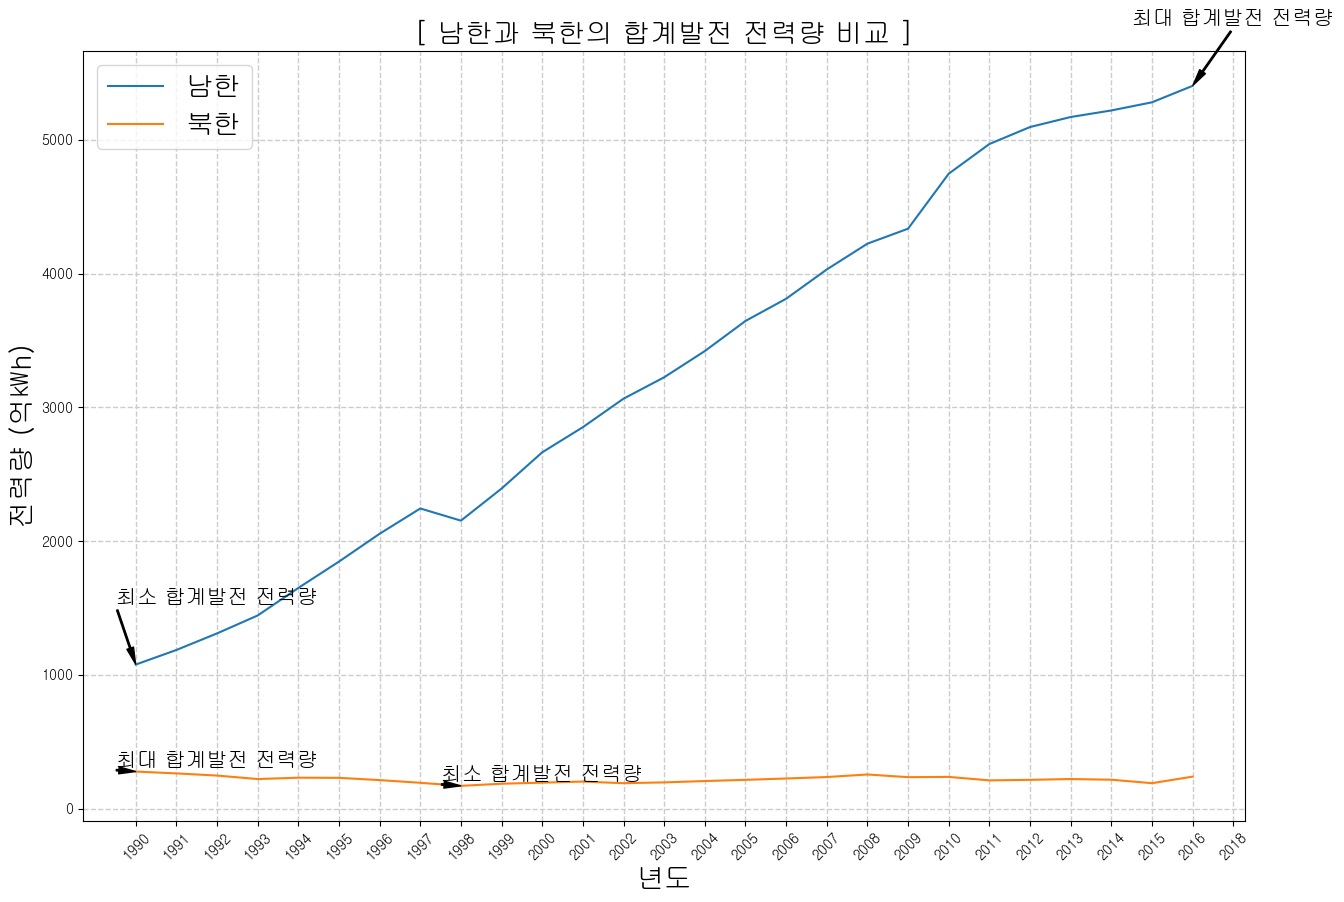

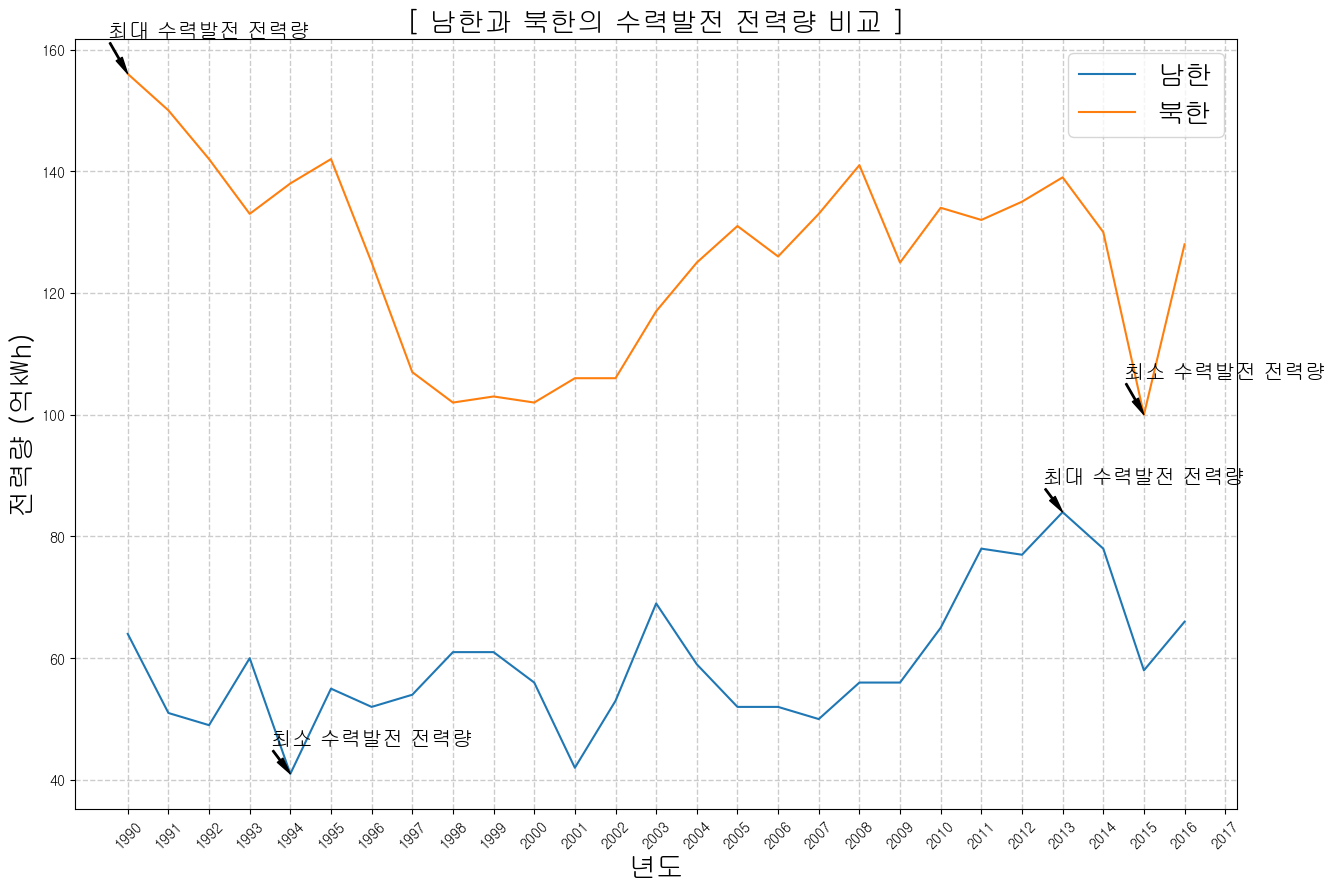

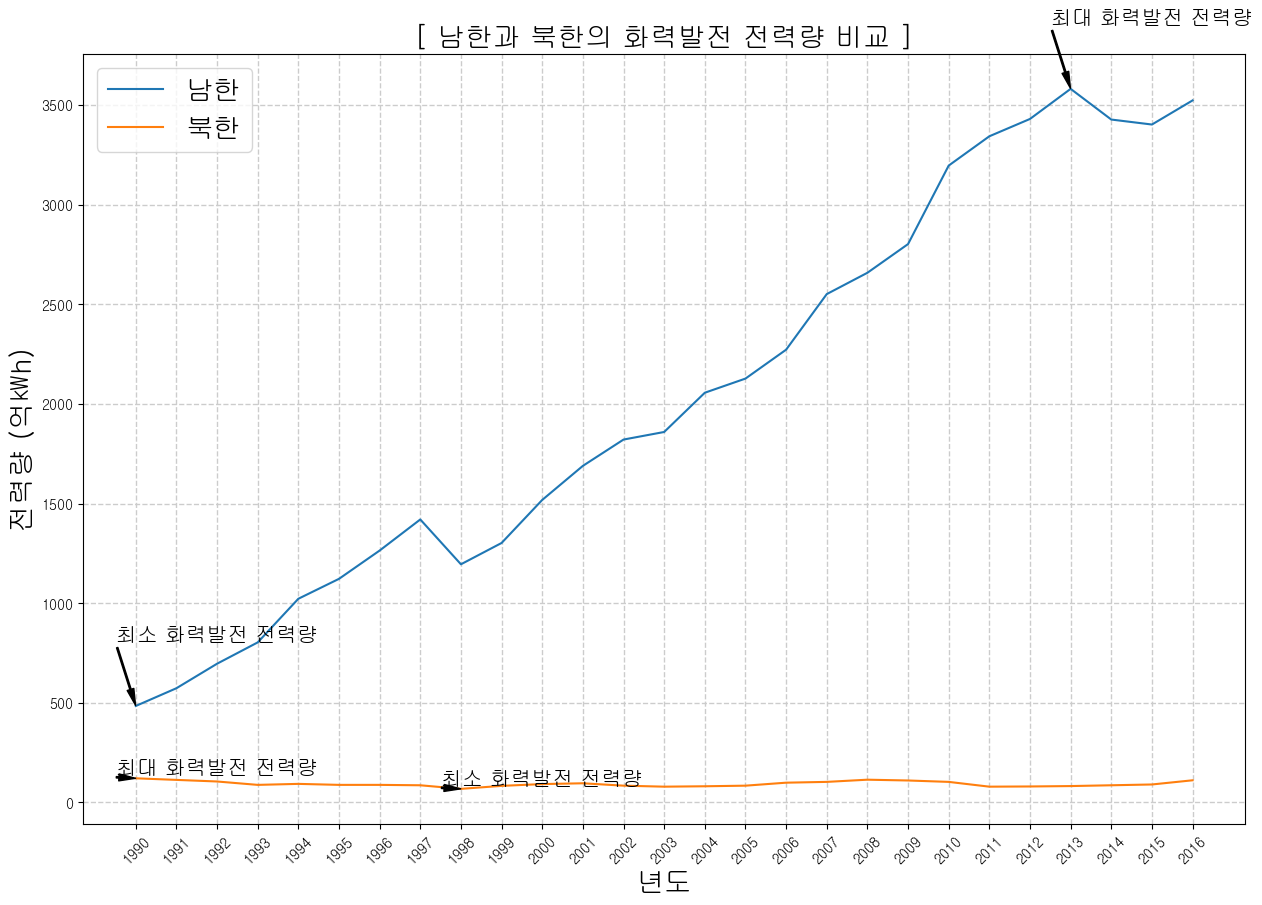

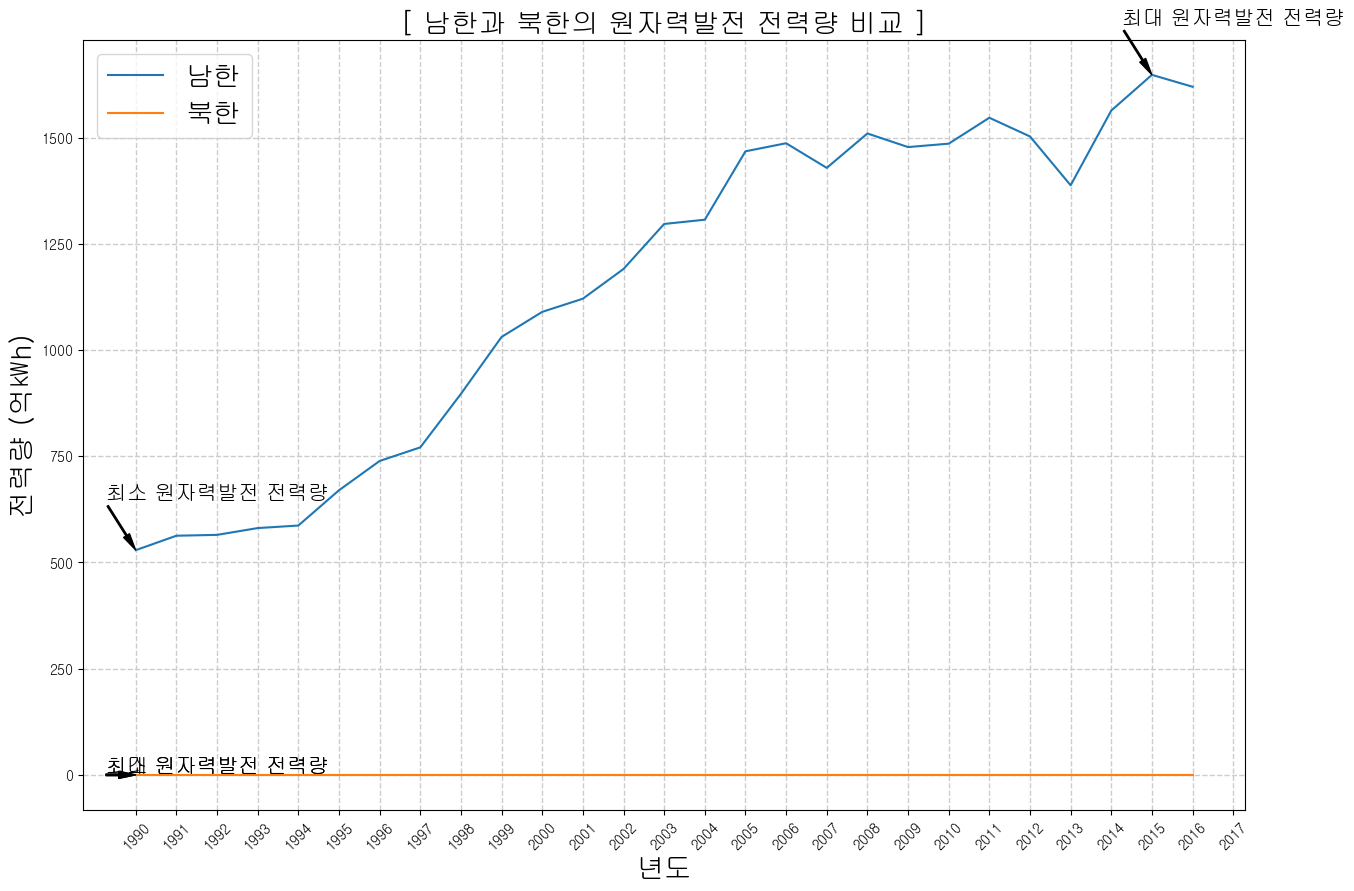

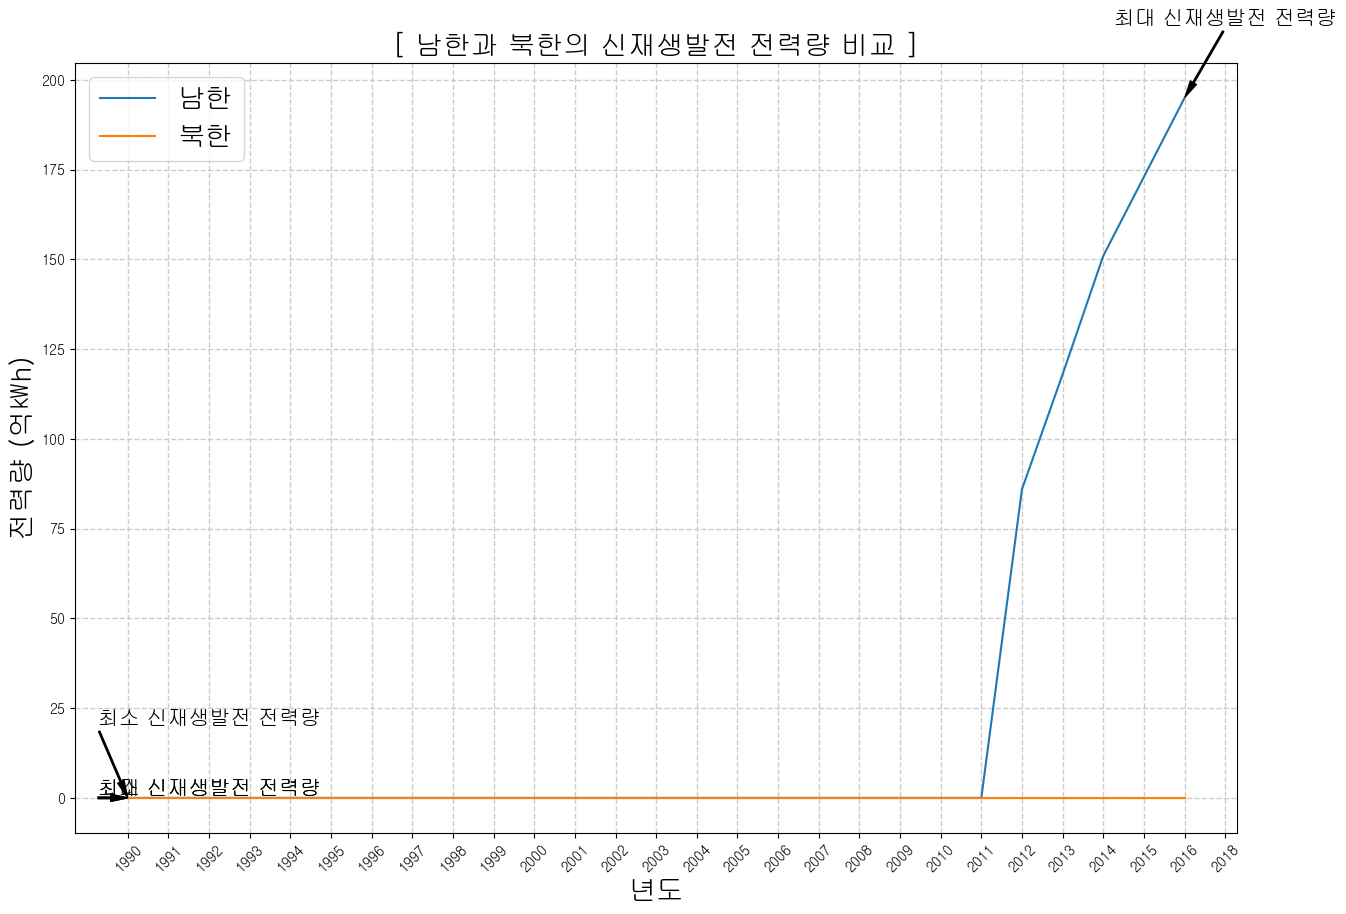

In [159]:
# plt.plot 사용
first_ind = list(dict.fromkeys(powerDF.index.get_level_values(0)))
second_ind = list(dict.fromkeys(powerDF.index.get_level_values(1)))

for wat in second_ind:
    df = powerDF.xs(wat, level = 1)
    plt.figure(figsize = (15, 10))
    for i in range(len(first_ind)):
        plt.plot(df.loc[first_ind[i]])

    plt.title('[ 남한과 북한의 {}발전 전력량 비교 ]'.format(wat), fontsize = 20)
    plt.xlabel('년도', fontsize = 20)
    plt.ylabel('전력량 (억㎾h)', fontsize = 20)
    plt.xticks(rotation = 45)
    plt.legend(['남한', '북한'], fontsize = 20)
    plt.grid(True, lw = 1, ls = '--', c = '0.8')

    for key, value in dict(df.T.idxmax()).items():
        x_incre = int(len(df.columns)/10)
        y_incre = (max(df.loc[key]) - min(df.loc[key])) / 10
        plt.annotate('최대 {}발전 전력량'.format(wat), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), df.loc[key, value] + y_incre),
                     xy = (value, df.loc[key, value]), fontsize = 15,
                     arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

    for key, value in dict(df.T.idxmin()).items():
        x_incre = int(len(df.columns)/10)
        y_incre = (max(df.loc[key]) - min(df.loc[key])) / 10
        plt.annotate('최소 {}발전 전력량'.format(wat), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), df.loc[key, value] + y_incre),
                     xy = (value, df.loc[key, value]), fontsize = 15,
                     arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

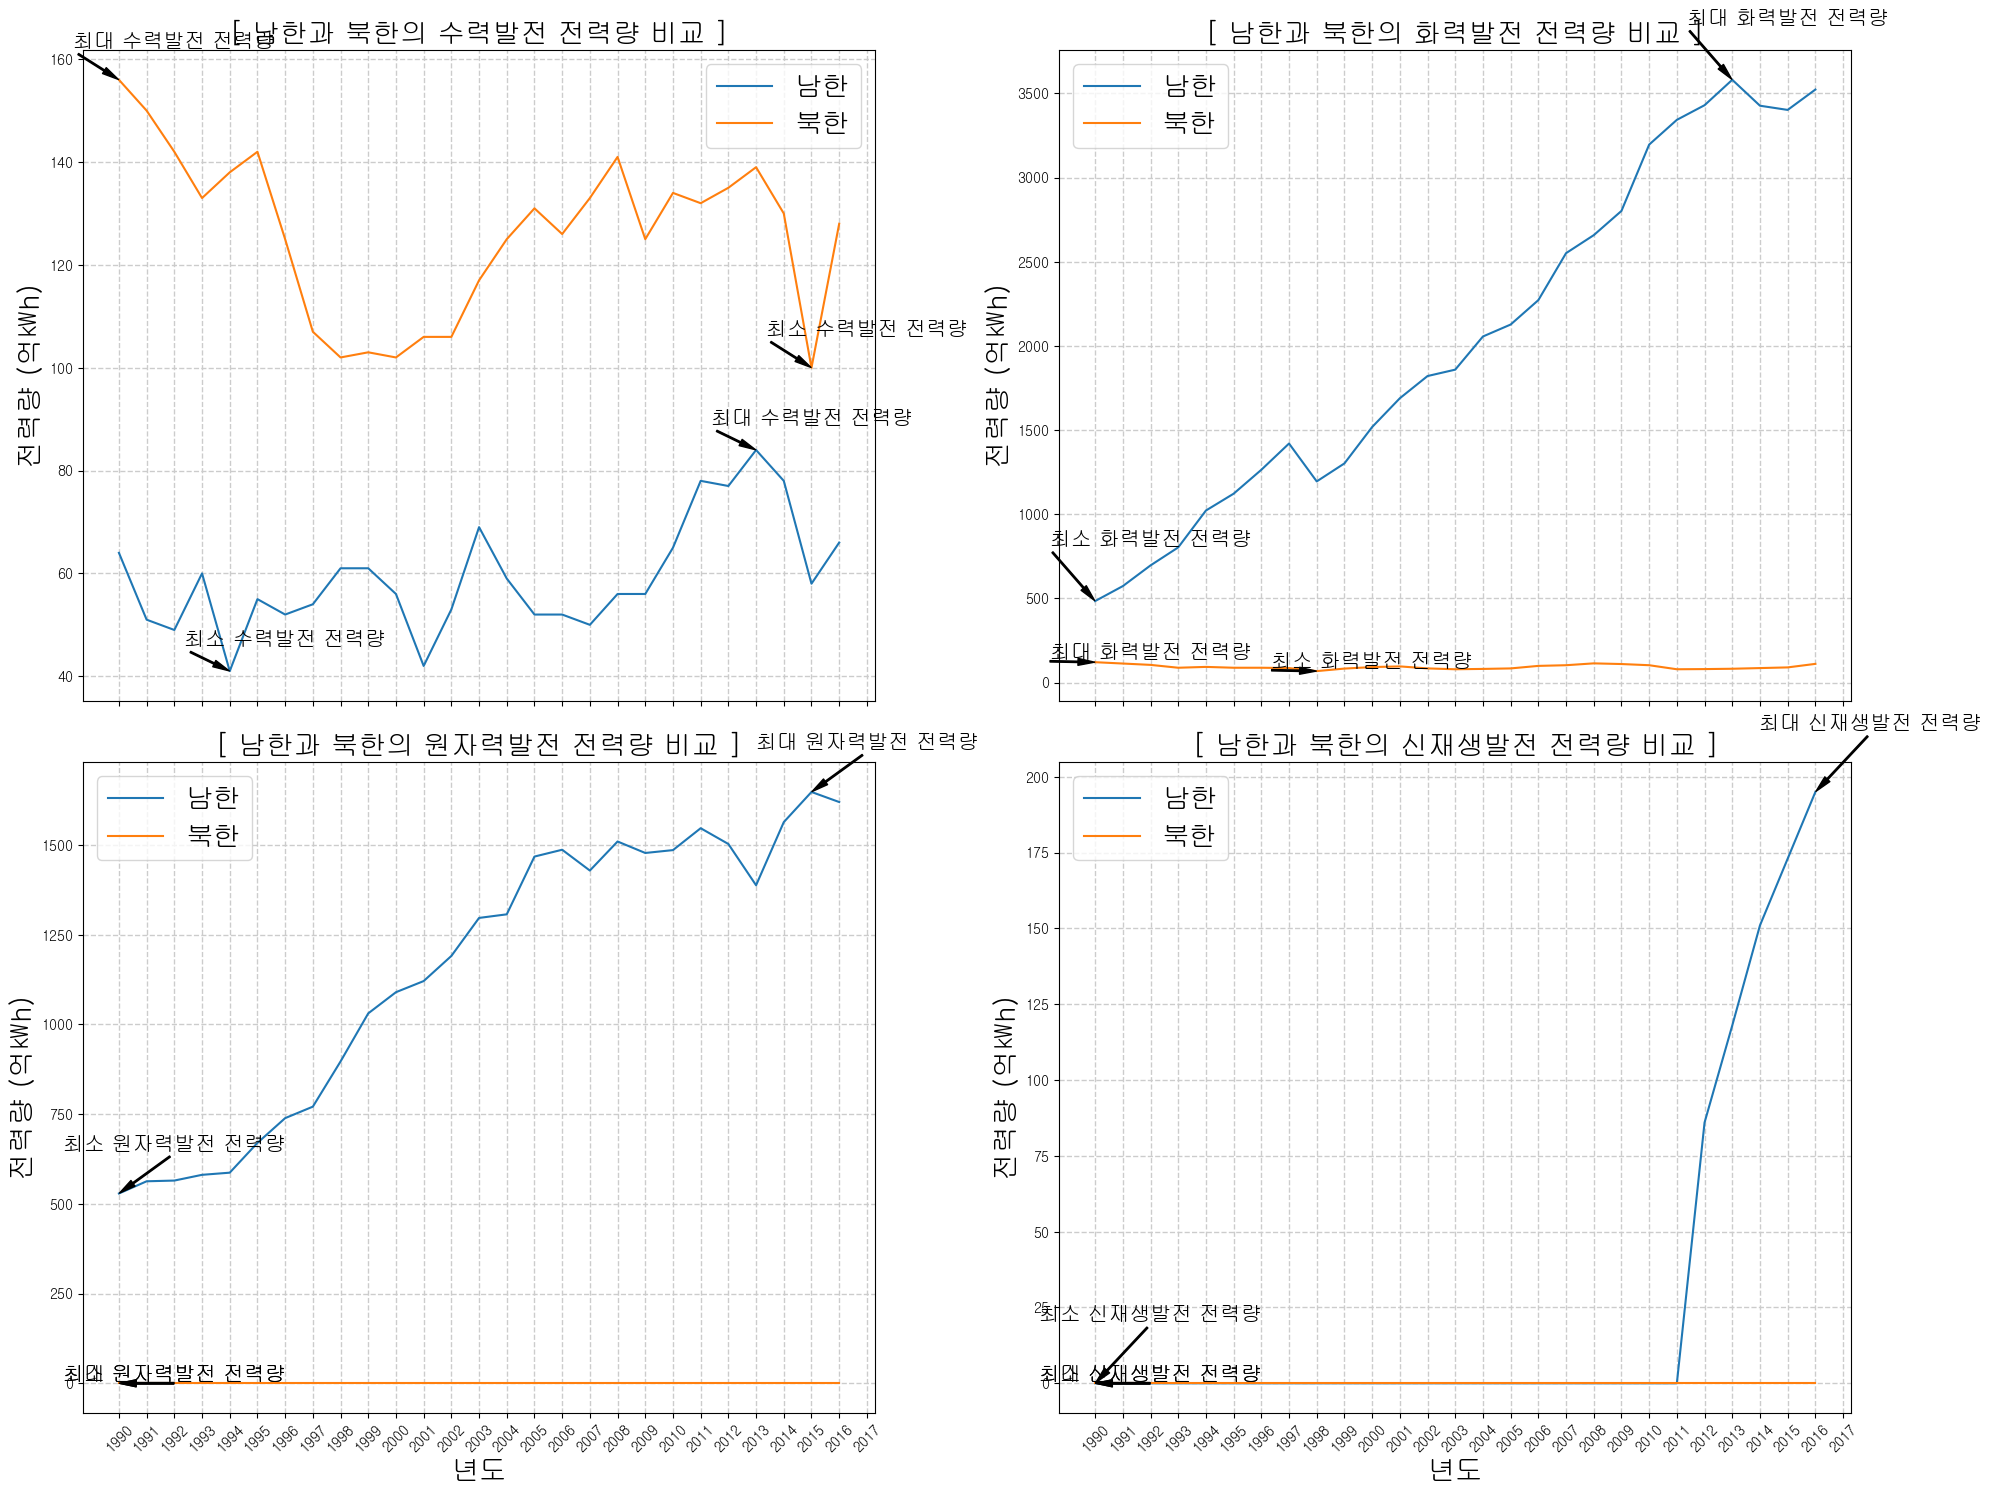

In [238]:
# plt.subplot 사용
first_ind = list(dict.fromkeys(powerDF.index.get_level_values(0)))
second_ind = list(dict.fromkeys(powerDF.index.get_level_values(1)))

i = 1
plt.figure(figsize = (20, 15))
for wat in second_ind:
    df = powerDF.xs(wat, level = 1)
    if i >= len(second_ind) - 1 and len(second_ind) >= 3:  # 추후 더 필요한 부분 수정
        plt.subplot(int(math.ceil(len(second_ind)/2)), 2, i, sharex = ax)
        plt.xlabel('년도', fontsize = 20)
    else:
        ax = plt.subplot(int(math.ceil(len(second_ind)/2)), 2, i)
    for j in range(len(first_ind)):
        plt.plot(df.loc[first_ind[j]])
    
    plt.title('[ 남한과 북한의 {}발전 전력량 비교 ]'.format(wat), fontsize = 20)
    plt.ylabel('전력량 (억㎾h)', fontsize = 20)
    if i < len(second_ind) - 1 and len(second_ind) >= 3:  # 추후 더 필요한 부분 수정
        plt.xticks(rotation = 45, visible = False)
    else:
        plt.xticks(rotation = 45)
    plt.legend(['남한', '북한'], fontsize = 20)
    plt.grid(True, lw = 1, ls = '--', c = '0.8')
    i += 1
    for key, value in dict(df.T.idxmax()).items():
        x_incre = int(len(df.columns)/10)
        y_incre = (max(df.loc[key]) - min(df.loc[key])) / 10
        plt.annotate('최대 {}발전 전력량'.format(wat), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), df.loc[key, value] + y_incre),
                     xy = (value, df.loc[key, value]), fontsize = 15,
                     arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

    for key, value in dict(df.T.idxmin()).items():
        x_incre = int(len(df.columns)/10)
        y_incre = (max(df.loc[key]) - min(df.loc[key])) / 10
        plt.annotate('최소 {}발전 전력량'.format(wat), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), df.loc[key, value] + y_incre),
                     xy = (value, df.loc[key, value]), fontsize = 15,
                     arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})
plt.tight_layout()
plt.show()

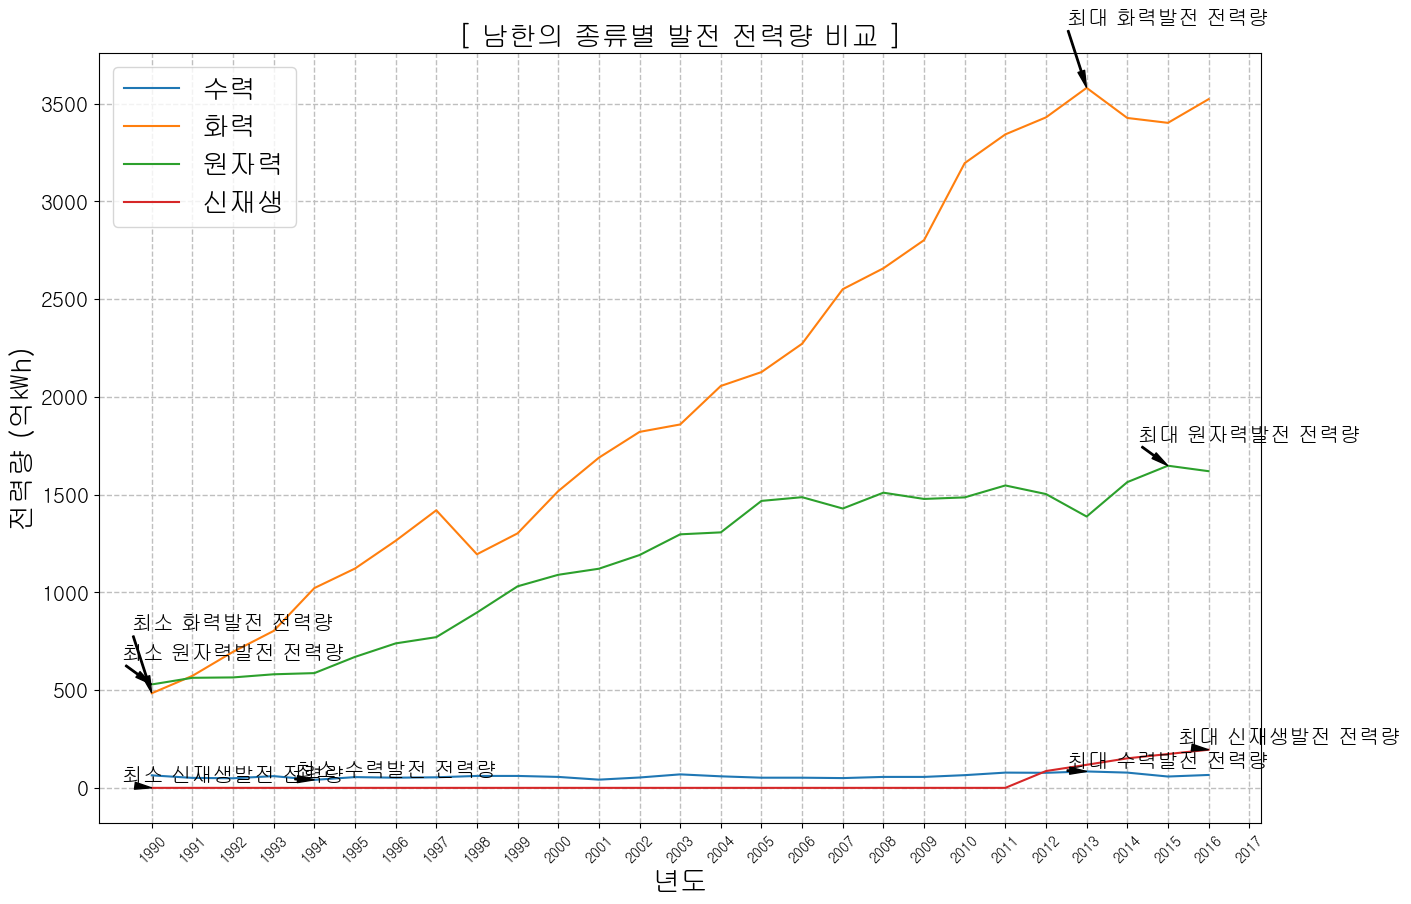

In [235]:
# plt.plot 사용
plt.figure(figsize = (15, 10))
for wat in south_df.index:
    plt.plot(south_df.loc[wat])

for key, value in dict(south_df.T.idxmax()).items():
    x_incre = int(len(south_df.columns)/10)
    y_incre = (max(south_df.loc[key]) - min(south_df.loc[key])) / 10
    plt.annotate('최대 {}발전 전력량'.format(key), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), south_df.loc[key, value] + y_incre),
                xy = (value, south_df.loc[key, value]), fontsize = 15,
                arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

for key, value in dict(south_df.T.idxmin()).items():
    x_incre = int(len(south_df.columns)/10)
    y_incre = (max(south_df.loc[key]) - min(south_df.loc[key])) / 10
    plt.annotate('최소 {}발전 전력량'.format(key), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), south_df.loc[key, value] + y_incre),
                xy = (value, south_df.loc[key, value]), fontsize = 15,
                arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

plt.xticks(rotation = 45)
plt.title('[ 남한의 종류별 발전 전력량 비교 ]', fontsize = 20)
plt.xlabel('년도', fontsize = 20)
plt.ylabel('전력량 (억㎾h)', fontsize = 20)
plt.yticks(fontsize = 15)
plt.legend(south_df.index, fontsize = 20)
plt.grid(True, lw = 1, ls = '--', c = '.75')

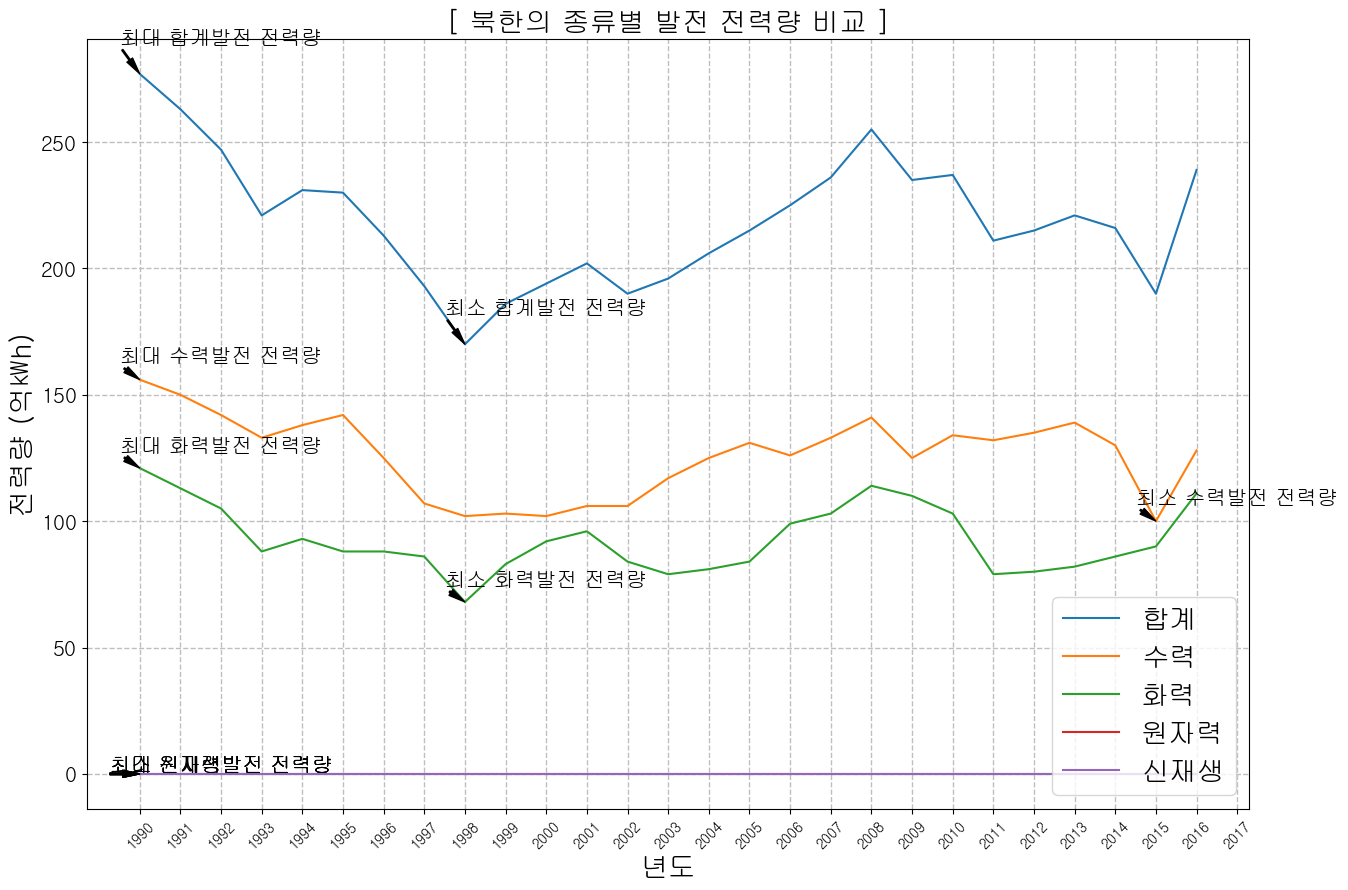

In [144]:
# plt.plot 사용
plt.figure(figsize = (15, 10))
for wat in north_df.index:
    plt.plot(north_df.loc[wat])

for key, value in dict(north_df.T.idxmax()).items():
    x_incre = int(len(south_df.columns)/10)
    y_incre = (max(north_df.loc[key]) - min(north_df.loc[key])) / 10
    plt.annotate('최대 {}발전 전력량'.format(key), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), north_df.loc[key, value] + y_incre),
                 xy = (value, north_df.loc[key, value]), fontsize = 15,
                 arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

for key, value in dict(north_df.T.idxmin()).items():
    x_incre = int(len(south_df.columns)/10)
    y_incre = (max(north_df.loc[key]) - min(north_df.loc[key])) / 10
    plt.annotate('최소 {}발전 전력량'.format(key), ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), north_df.loc[key, value] + y_incre),
                 xy = (value, north_df.loc[key, value]), fontsize = 15,
                 arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

plt.xticks(rotation = 45)
plt.title('[ 북한의 종류별 발전 전력량 비교 ]', fontsize = 20)
plt.xlabel('년도', fontsize = 20)
plt.ylabel('전력량 (억㎾h)', fontsize = 20)
plt.yticks(fontsize = 15)
plt.legend(north_df.index, loc = 'lower right', fontsize = 20)
plt.grid(True, lw = 1, ls = '--', c = '.75')

In [220]:
# plt.plot을 사용하여 함수 구현
def power_analysis(df):

    first_ind = list(dict.fromkeys(df.index.get_level_values(0)))
    second_ind = list(dict.fromkeys(df.index.get_level_values(1)))
    for wat in second_ind:
        plt.figure(figsize = (15, 10))
        power_df = df.xs(wat, level = 1)
        for i in range(len(first_ind)):
            plt.plot(power_df.loc[first_ind[i]])

        plt.title(f'[ 남한과 북한의 {wat}발전 전력량 비교 ]', fontsize = 20)
        plt.xlabel('년도', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)
        plt.xticks(rotation = 45)
        plt.legend(first_ind, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '0.8')

        for key, value in dict(power_df.T.idxmax()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최대 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

        for key, value in dict(power_df.T.idxmin()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최소 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

    for i in range(len(first_ind)):
        globals()['some_df{}'.format(i)] = df.xs(first_ind[i], level = 0)


    for i in range(len(first_ind)):
        plt.figure(figsize = (15, 10))
        for wat in second_ind:
            plt.plot(globals()['some_df{}'.format(i)].loc[wat])

        plt.xticks(rotation = 45)
        plt.title(f'[ {first_ind[i]}의 종류별 발전 전력량 비교 ]', fontsize = 20)
        plt.xlabel('년도', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)
        plt.yticks(fontsize = 15)
        plt.legend(globals()['some_df{}'.format(i)].index, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '.75')

        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmax()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최대 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})
        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmin()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최소 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

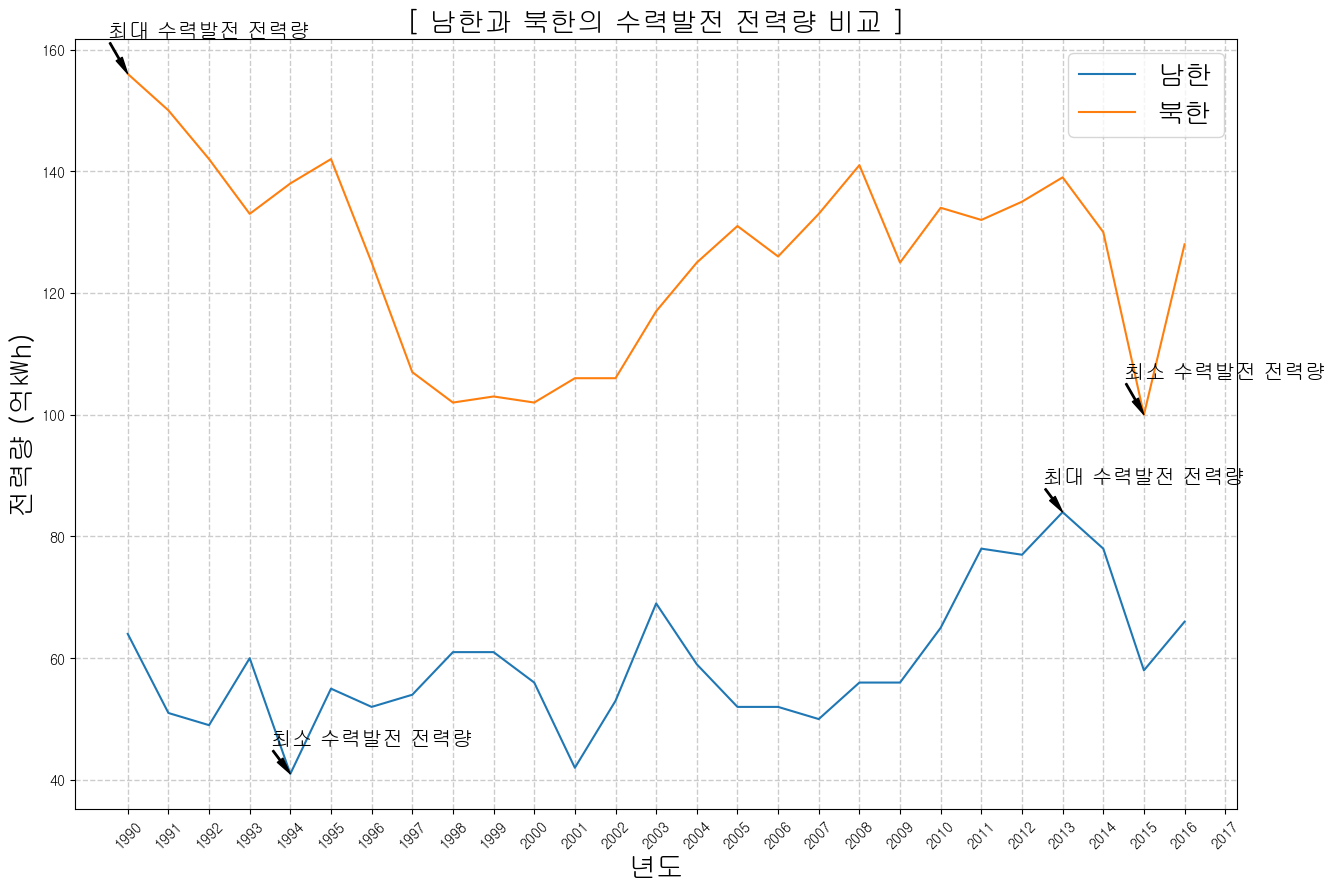

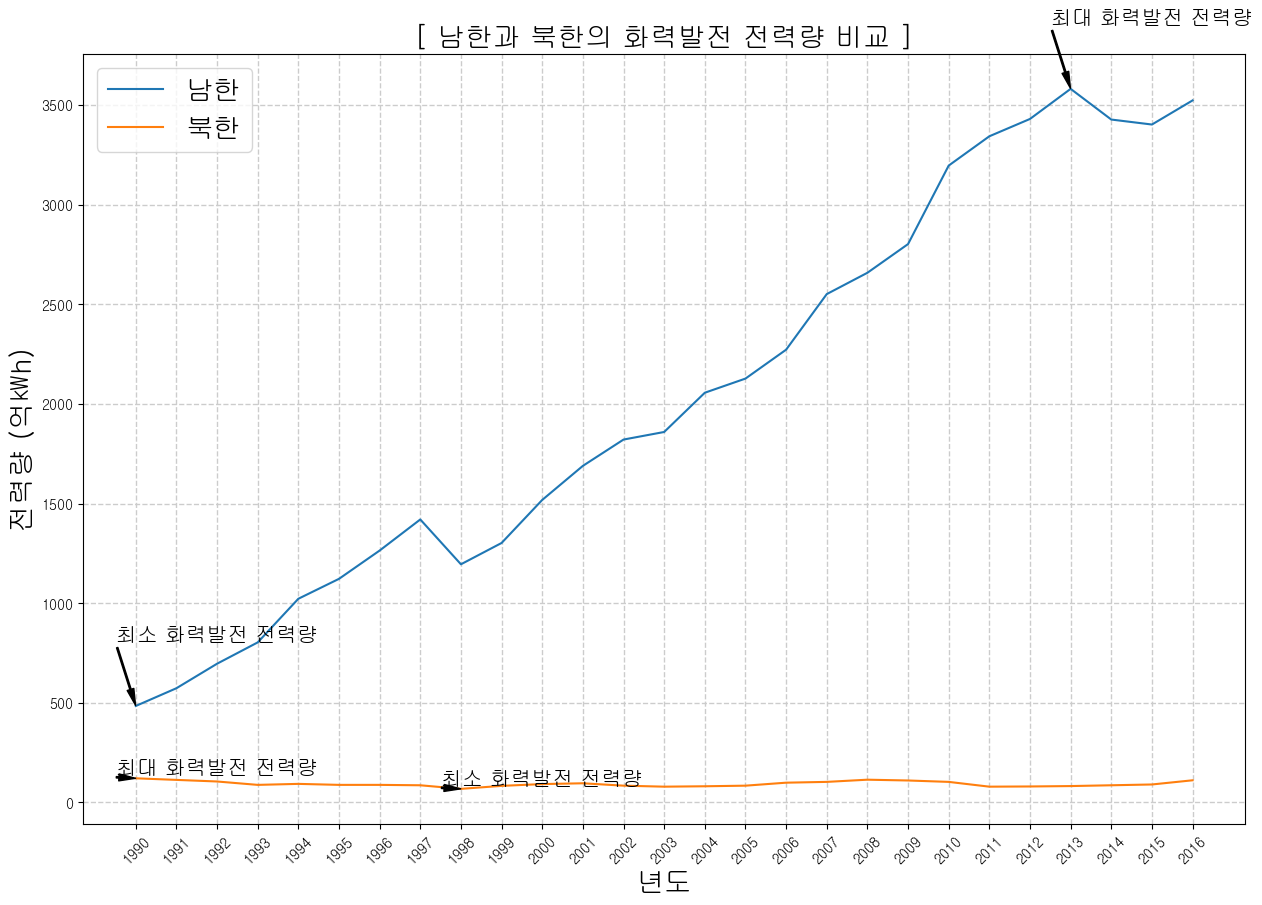

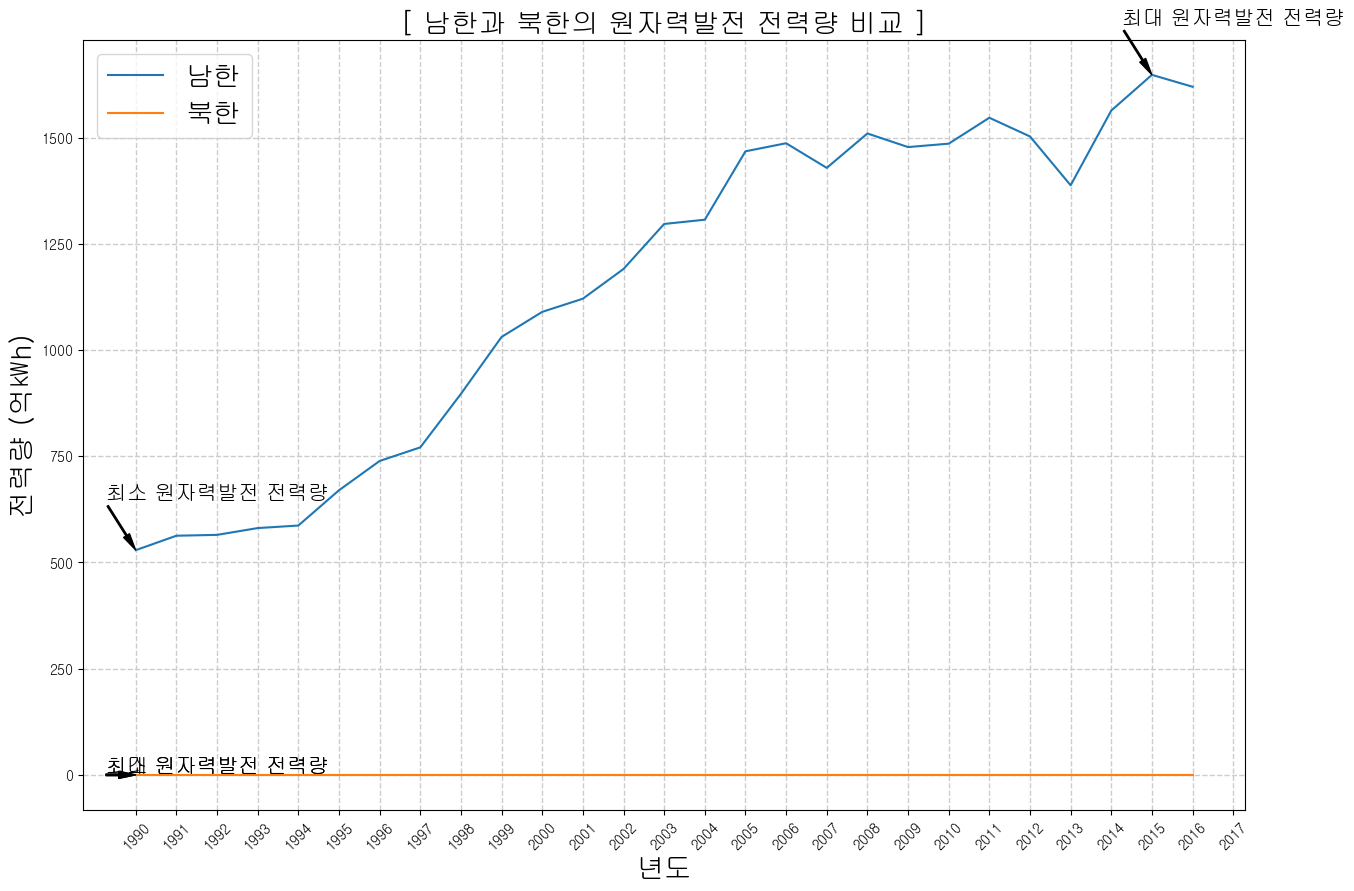

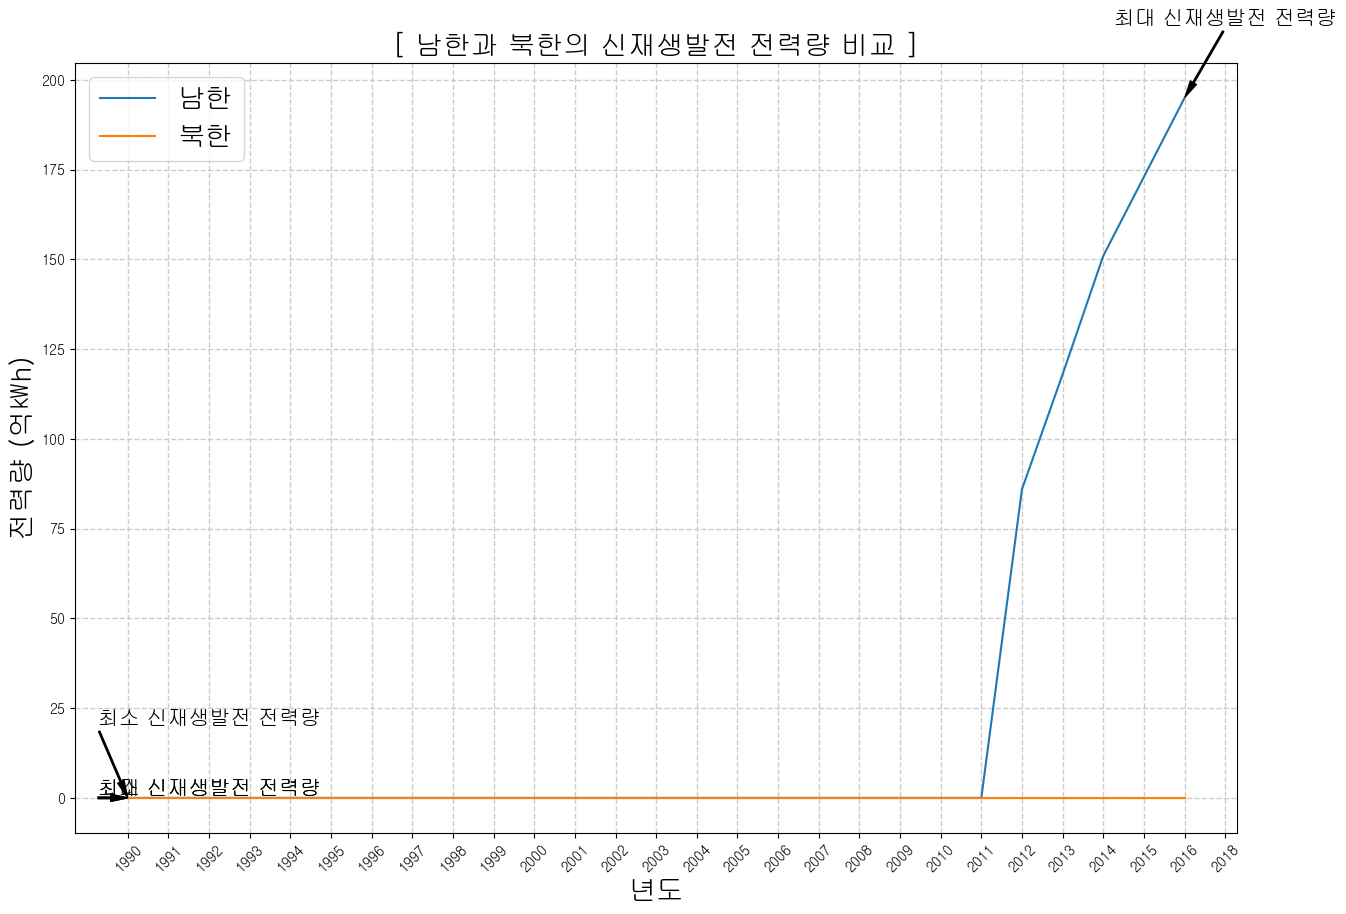

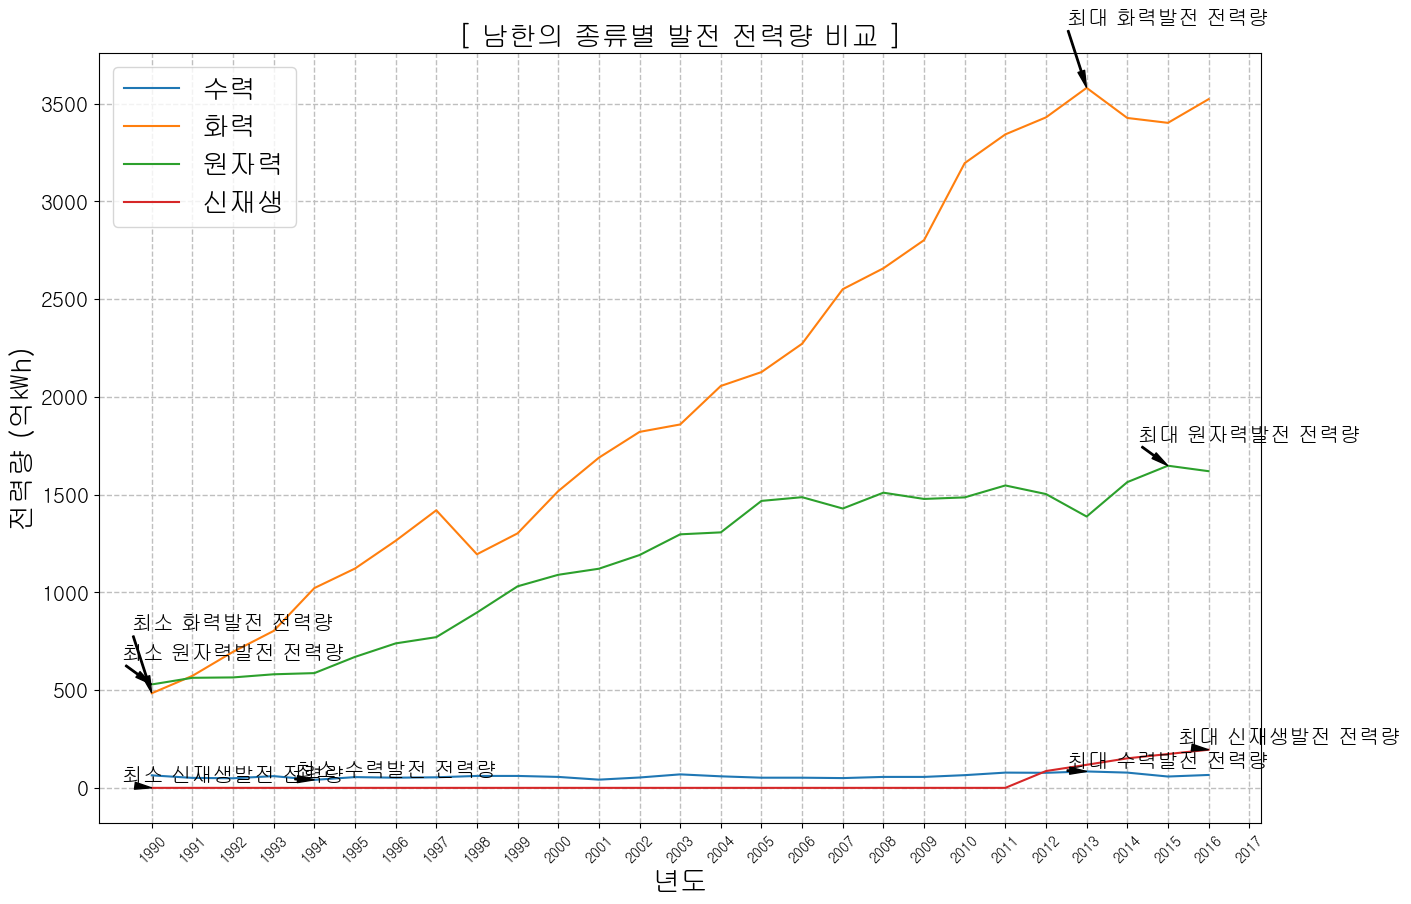

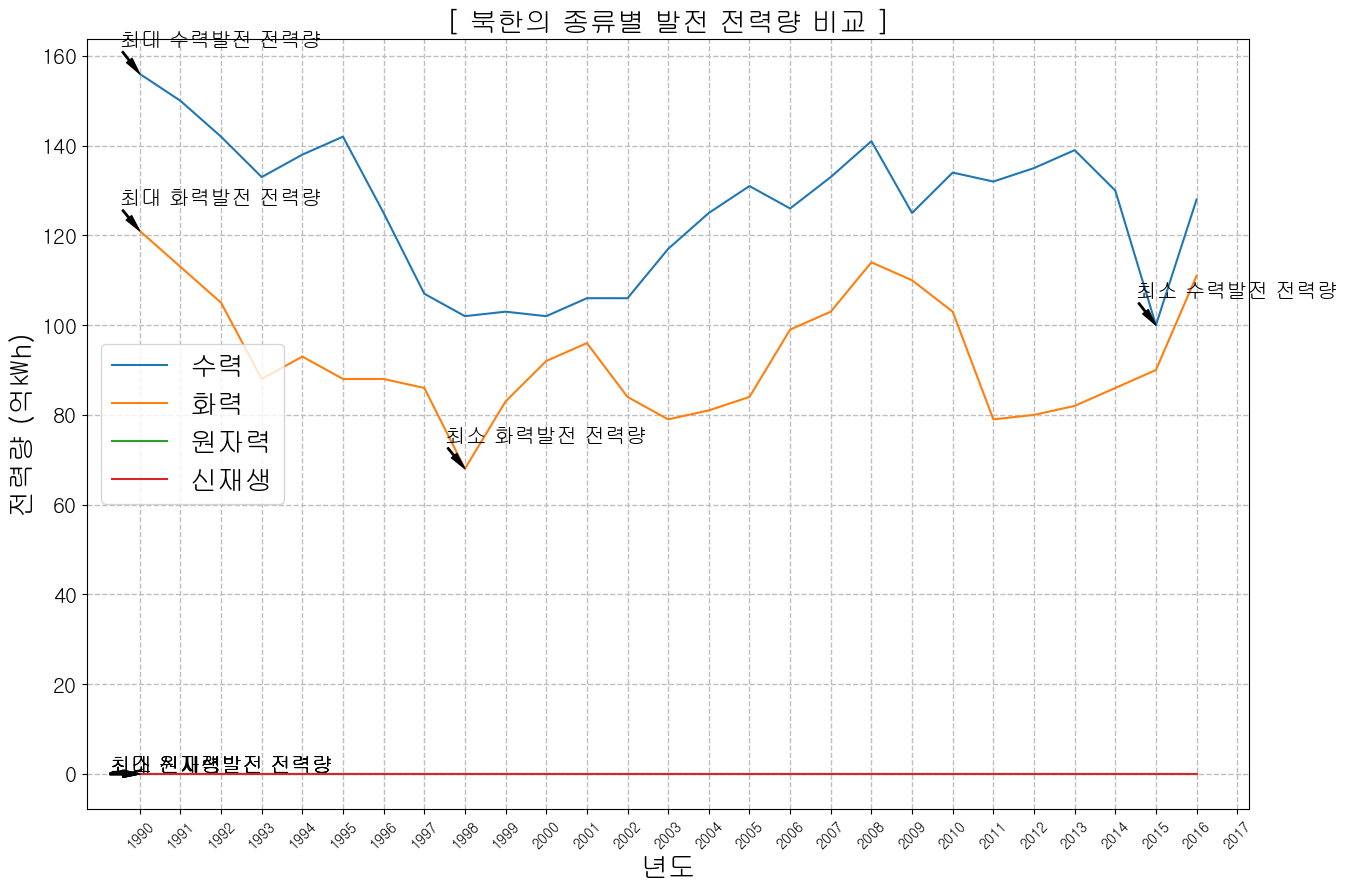

In [221]:
power_analysis(powerDF)

In [236]:
# plt.subplot를 사용하여 함수 구현
def power_analysis2(df):

    first_ind = list(dict.fromkeys(df.index.get_level_values(0)))
    second_ind = list(dict.fromkeys(df.index.get_level_values(1)))
    i = 1
    plt.figure(figsize = (20, 15))
    for wat in second_ind: 
        power_df = df.xs(wat, level = 1)
        if i >= len(second_ind) - 1 and len(second_ind) >= 3:  # 추후 더 필요한 부분 수정
            plt.subplot(int(math.ceil(len(second_ind)/2)), 2, i, sharex = ax)
            plt.xlabel('년도', fontsize = 20)
        else:
            ax = plt.subplot(int(math.ceil(len(second_ind)/2)), 2, i)
        for j in range(len(first_ind)):
            plt.plot(power_df.loc[first_ind[j]])

        plt.title(f'[ 남한과 북한의 {wat}발전 전력량 비교 ]', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)
        if i < len(second_ind) - 1 and len(second_ind) >= 3:  # 추후 더 필요한 부분 수정
            plt.xticks(rotation = 45, visible = False)
        else:
            plt.xticks(rotation = 45)
        plt.legend(first_ind, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '0.8')
        i += 1
        
        for key, value in dict(power_df.T.idxmax()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최대 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

        for key, value in dict(power_df.T.idxmin()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최소 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

    for i in range(len(first_ind)):
        globals()['some_df{}'.format(i)] = df.xs(first_ind[i], level = 0)

    plt.figure(figsize = (15, 10))
    for i in range(len(first_ind)):
        if i >= len(first_ind) - 1 and len(first_ind) >= 3:  # 추후 더 필요한 부분 수정
            plt.subplot(int(math.ceil(len(first_ind)/2)), 2, i + 1, sharex = ax2)
        else:
            ax2 = plt.subplot(int(math.ceil(len(first_ind)/2)), 2, i + 1)
            plt.xlabel('년도', fontsize = 20)
        for wat in second_ind:
            plt.plot(globals()['some_df{}'.format(i)].loc[wat])

        plt.xticks(rotation = 45)
        plt.title(f'[ {first_ind[i]}의 종류별 발전 전력량 비교 ]', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)

        if i < len(first_ind) - 1 and len(first_ind) >= 3:  # 추후 더 필요한 부분 수정
            plt.xticks(rotation = 45, visible = False)
        else:
            plt.xticks(rotation = 45)
        plt.xticks(rotation = 45)
        plt.yticks(fontsize = 15)
        plt.legend(globals()['some_df{}'.format(i)].index, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '.75')

        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmax()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최대 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})
        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmin()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최소 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

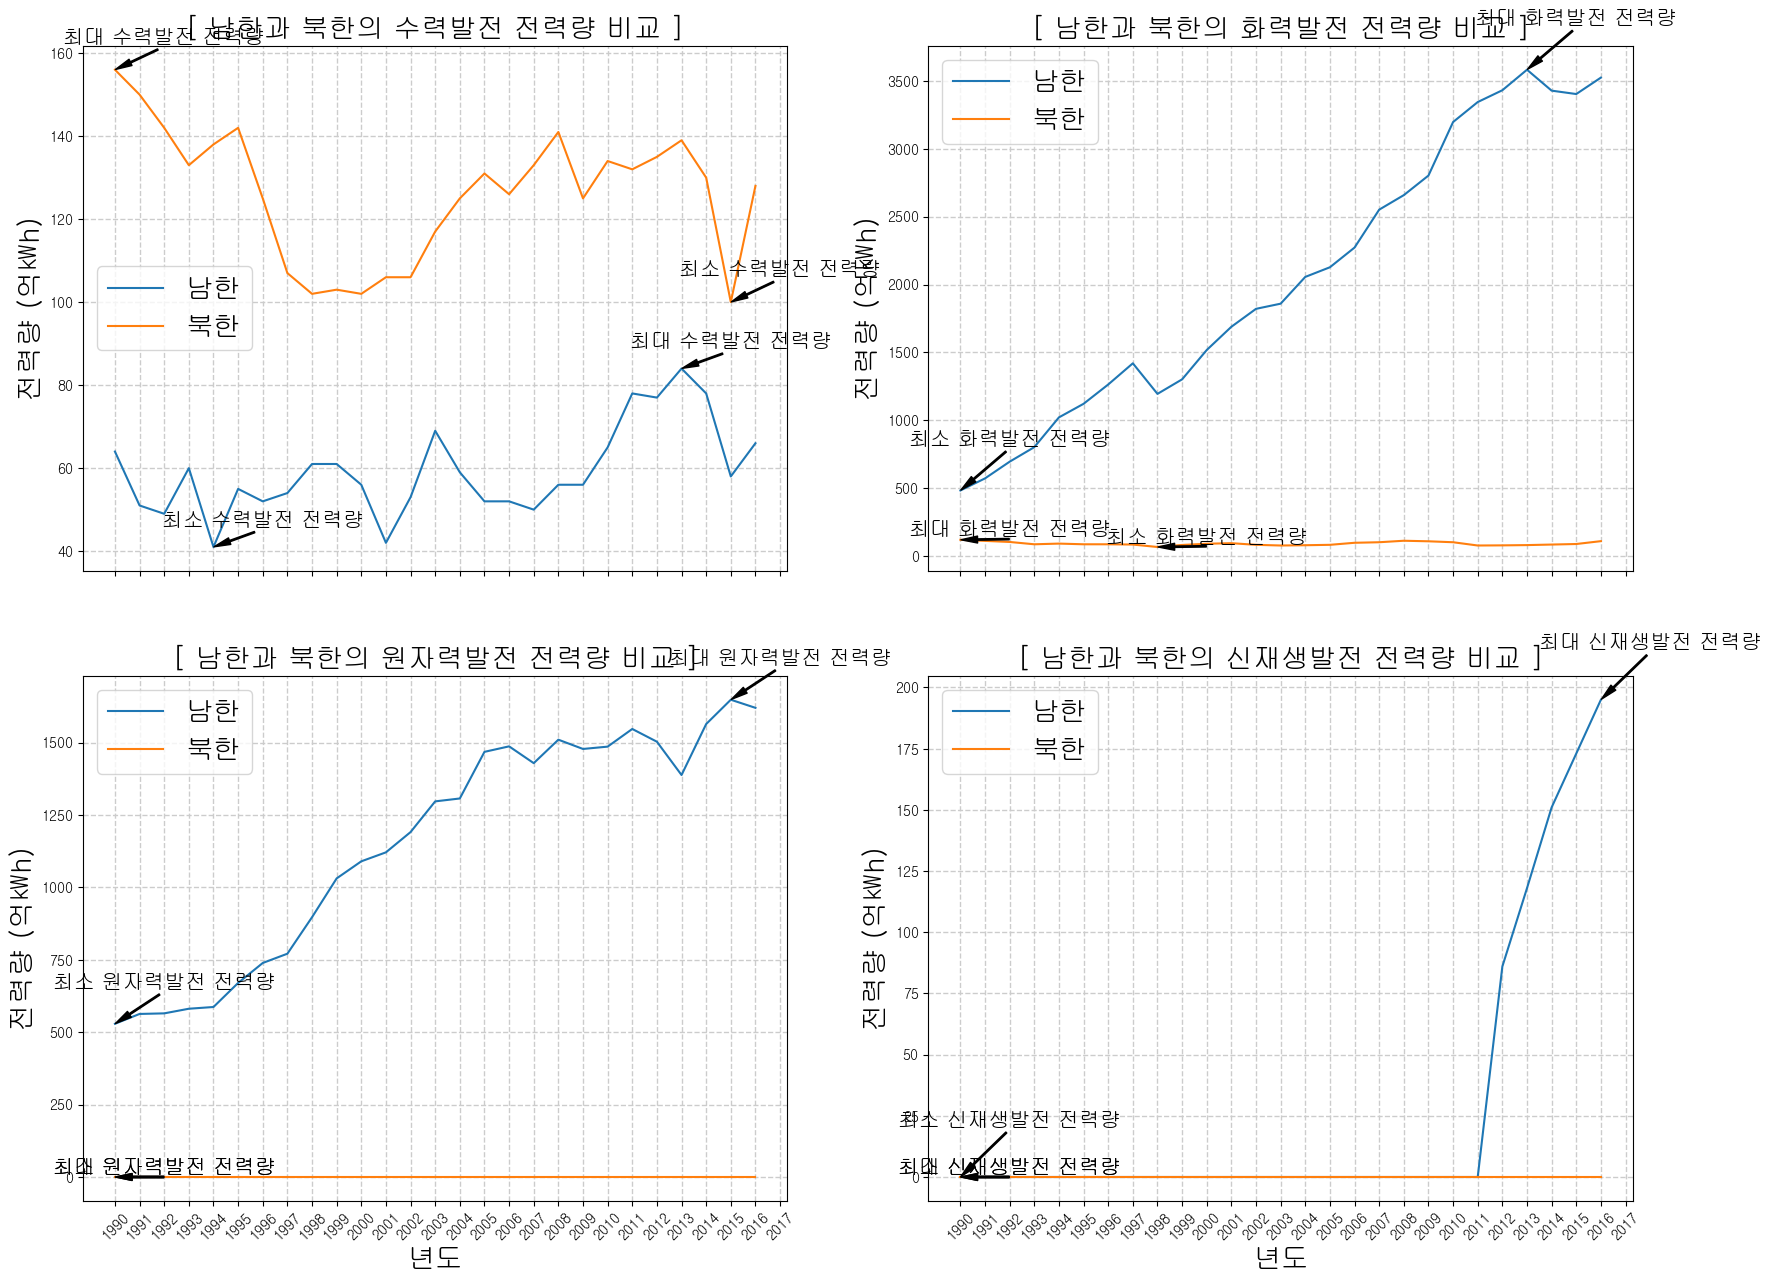

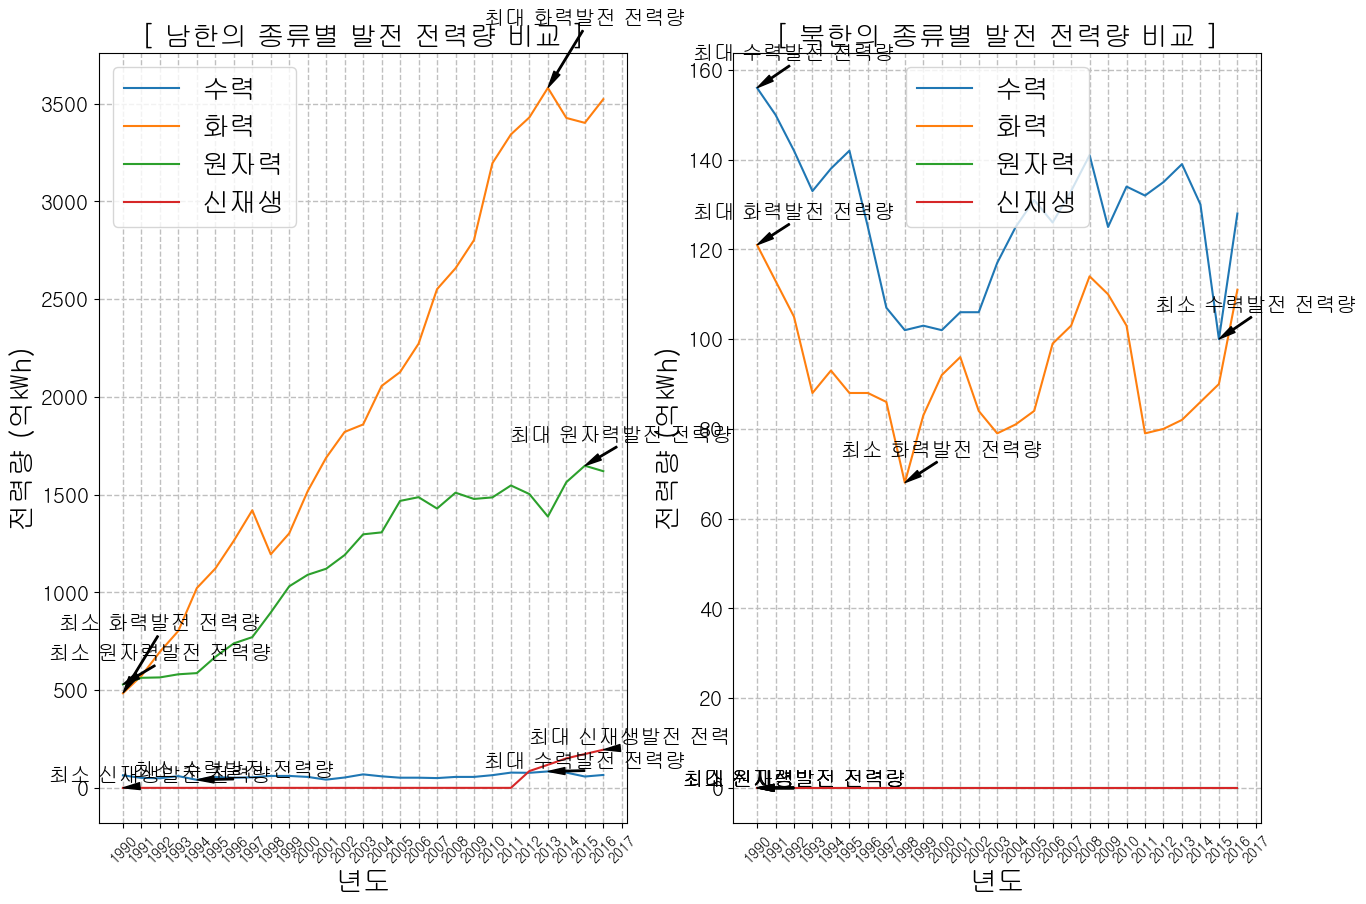

In [237]:
power_analysis2(powerDF)

In [ ]:
# plt.subplots를 사용하여 함수 구현
def power_analysis3(df):

    first_ind = list(dict.fromkeys(df.index.get_level_values(0)))
    second_ind = list(dict.fromkeys(df.index.get_level_values(1)))
    for wat in second_ind:
        plt.figure(figsize = (15, 10))
        power_df = df.xs(wat, level = 1)
        for i in range(len(first_ind))
            plt.plot(power_df.loc[first_ind[i]])

        plt.title(f'[ 남한과 북한의 {wat}발전 전력량 비교 ]', fontsize = 20)
        plt.xlabel('년도', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)
        plt.xticks(rotation = 45)
        plt.legend(first_ind, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '0.8')

        for key, value in dict(power_df.T.idxmax()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최대 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

        for key, value in dict(power_df.T.idxmin()).items():
            x_incre = int(len(power_df.columns)/10)
            y_incre = (max(power_df.loc[key]) - min(power_df.loc[key])) / 10
            plt.annotate(f'최소 {wat}발전 전력량', ha = 'center', va = 'bottom', xytext = (str(int(value) + x_incre), power_df.loc[key, value] + y_incre),
                        xy = (value, power_df.loc[key, value]), fontsize = 15,
                        arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

    for i in range(len(first_ind)):
        globals()['some_df{}'.format(i)] = df.xs(first_ind[i], level = 0)


    for i in range(len(first_ind)):
        plt.figure(figsize = (15, 10))
        for wat in second_ind:
            plt.plot(globals()['some_df{}'.format(i)].loc[wat])

        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmax()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최대 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})
        for key, value in dict(globals()['some_df{}'.format(i)].T.idxmin()).items():
            x_incre = int(len(globals()['some_df{}'.format(i)].columns)/10)
            y_incre = (max(globals()['some_df{}'.format(i)].loc[key]) - min(globals()['some_df{}'.format(i)].loc[key])) / 10
            plt.annotate('최소 {}발전 전력량'.format(key), ha = 'center', va = 'bottom',
                         xytext = (str(int(value) + x_incre), globals()['some_df{}'.format(i)].loc[key, value] + y_incre),
                         xy = (value, globals()['some_df{}'.format(i)].loc[key, value]), fontsize = 15,
                         arrowprops = {'facecolor' : 'k', 'edgecolor' : 'k', 'shrink' : 0.01, 'width' : 1, 'headwidth' : 5})

        plt.xticks(rotation = 45)
        plt.title(f'[ {first_ind[i]}의 종류별 발전 전력량 비교 ]', fontsize = 20)
        plt.xlabel('년도', fontsize = 20)
        plt.ylabel('전력량 (억㎾h)', fontsize = 20)
        plt.yticks(fontsize = 15)
        plt.legend(globals()['some_df{}'.format(i)].index, fontsize = 20)
        plt.grid(True, lw = 1, ls = '--', c = '.75')

In [ ]:
power_analysis3(powerDF)